## Previous Course

1、What's the Language Model? OOV Problem?

#### Out of Vocabulary(OOV)
- 万一当某一个词出现的次数为0时怎么办？
- 推荐一种方法，对某一个出现概率为 0 的词设置一个固定的概率，这个概率小于出现次数为 1 的单词的概率
$$ Pr(w_0) = constant < Pr(w_1) $$
- Language Model：Smooth

2、Syntax Tree. lambda

In [10]:
import random

In [11]:
def adj(): return random.choice("蓝色的 | 好看的 | 小小的".split("|")).split()[0]

In [12]:
def adj_star_2():
    return random.choice([lambda : '', lambda : adj() + adj_star_2()])()

def adj_star():
    return random.choice(['', adj() + adj_star()])

In [13]:
adj_star_2()

'好看的'

In [14]:
adj_star()

RecursionError: maximum recursion depth exceeded while calling a Python object

如以上看到，使用adj_star()时，会出现死循环，导致递归深度超出限制

解决方法是使用lambda，lambda是一个定义函数的东西，在这里，使用lambda可以让函数在选择到adj_star_2()时，才会运行

也就是说，在adj_star()中，不管choice选择的是前面的‘’ 还是后面的函数，里面所有的东西都会执行一遍，而在adj_star_2中，只有当choice选择lambda时，才会执行lambda里面的内容

##  Search Policy

In [15]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [16]:
city_location = {
    '香港':(114.17,22.28)
}

In [17]:
city_location

{'香港': (114.17, 22.28)}

In [18]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]}"

In [19]:
import re  #导入正则表达式包

In [20]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [21]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
        
    # following : we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    city_location[city] = (long, lat)

In [22]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [23]:
import math

In [24]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [25]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [26]:
get_geo_distance('上海', '杭州')

153.5185697155768

In [27]:
import networkx as nx

In [28]:
city_graph = nx.Graph()

In [29]:
city_graph.add_nodes_from(list(city_location.keys()))

In [30]:
%matplotlib inline

In [31]:
from matplotlib.font_manager import _rebuild
_rebuild()

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

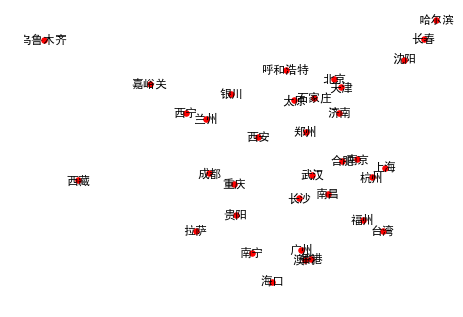

In [33]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [34]:
simple_connection_info = {
    '北京':['太原','沈阳'],
    '沈阳':['北京'],
    '太原':['北京','西安','郑州'],
    '郑州':['太原'],
    '兰州':['西安'],
    '西安':['兰州','长沙'],
    '长沙':['福州','南宁']
}

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


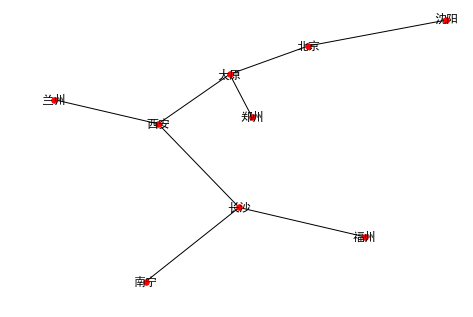

In [35]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30)

In [36]:
# 广度优先遍历
def search(city1, city2, connection_grpah, sort_candidate):
    pathes = [[city1]]
    visited = set()
    
    while pathes:
#        print(pathes)
        path = pathes.pop(0)
#        print(path)
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == city2: return new_path
            
        visited.add(froninter)
        
        pathes = sort_candidate(pathes)   #这里可以自定义排序函数

In [37]:
search('北京','福州',simple_connection_info)

TypeError: search() missing 1 required positional argument: 'sort_candidate'

In [38]:
def pretty_print(cities):
    print("🚗🚗".join(cities))

In [39]:
pretty_print(search('北京','福州',simple_connection_info))

TypeError: search() missing 1 required positional argument: 'sort_candidate'

In [40]:
from collections import defaultdict
threshold = 300
city_connection = defaultdict(list)

In [41]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)

In [42]:
city_connection

defaultdict(list,
            {'香港': ['广州', '长沙', '澳门'],
             '兰州': ['西宁', '成都', '银川'],
             '西宁': ['兰州', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '拉萨', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '北京'],
             '拉萨': ['西宁', '成都'],
             '贵阳': ['重庆', '南宁'],
             '武汉': ['郑州', '南昌', '长沙'],
             '郑州': ['石家庄', '武汉', '长沙', '太原'],
             '济南': ['石家庄', '合肥', '北京', '天津'],
             '南京': ['合肥', '杭州'],
             '合肥': ['济南', '南京', '南昌'],
             '杭州': ['南京', '福州', '上海'],
             '南昌': ['武汉', '合肥'],
             '福州': ['杭州', '台湾'],
             '广州': ['香港', '长沙', '澳门'],
             '长沙': ['香港', '武汉', '郑州', '广州', '澳门'],
             '海口': ['南宁'],
             '沈阳': ['长春'],
             '长春': ['沈阳', '哈尔滨'],
             '哈尔滨': ['长春'],
             '太原': ['石家庄', '郑州', '呼和浩特'],
             '台湾': ['福州'],
             '北京': ['石家庄', '济南', '天津'],
             '上海': ['杭州'],
             '重庆': ['成都', '贵阳', '银川'],
             '天津': 

In [43]:
city_with_road = nx.Graph(city_connection)

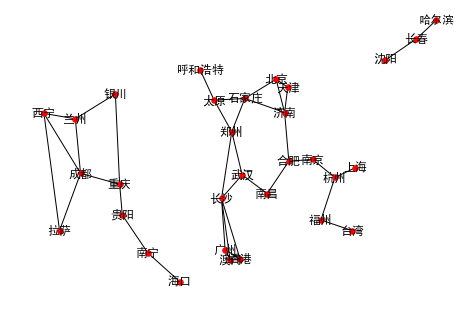

In [44]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [45]:
pretty_print(search('北京','香港',city_connection))

TypeError: search() missing 1 required positional argument: 'sort_candidate'

In [46]:
pretty_print(search('北京','西藏',city_connection))

TypeError: search() missing 1 required positional argument: 'sort_candidate'

In [47]:
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [48]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance
    return sorted(pathes, key=get_path_distance)

In [49]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [50]:
pretty_print(search('北京','香港',city_connection, transfer_as_much_possible))

北京🚗🚗石家庄🚗🚗郑州🚗🚗武汉🚗🚗长沙🚗🚗香港


In [51]:
pretty_print(search('北京','香港',city_connection, shortest_path_first))

北京🚗🚗石家庄🚗🚗郑州🚗🚗长沙🚗🚗香港


In [52]:
pretty_print(search('北京','香港',city_connection, transfer_stations_first))

北京🚗🚗石家庄🚗🚗郑州🚗🚗长沙🚗🚗香港


### depth first search
### breath first search

In [53]:
# 使用defaultdict，将字典的key做一个类型转换，从而使得在输入一个不存在的key时，不会报错，而是返回一个空类型（实际返回哪个类型在defaultdict()中指定）
from collections import defaultdict
simple_connection_info_result = defaultdict(list)
simple_connection_info_result.update(simple_connection_info)

In [54]:
print(simple_connection_info['澳门'])

KeyError: '澳门'

In [55]:
print(simple_connection_info_result['澳门'])

[]


In [56]:
number_graph = defaultdict(list)

number_graph.update({
    1: [2, 3],
    2: [1, 4],
    3: [1, 5],
    4: [2, 6],
    5: [3, 7],
    6: [4, 8],
    7: [5, 9]
})

In [57]:
def bfs(graph, start):
    """
    breath first search
    """
    
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop()
        
        if froninter in seen: continue
            
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            #visited.append(successor)
            
            #visited = visited + [successor]    #1
            
            visited = [successor] + visited    #3
            
            #1的扩展逻辑是：将新扩展的点放到visited 列表的最后方，下一次执行while循环时，取出最后方的一个点来做遍历，这就实现了深度优先遍历
            #2的扩展逻辑则是：将新扩展的点放到visited的最前方，这样下次执行while时，取出的最后方的一个点就是先扩展到的点，这就实现了广度优先遍历
            
        seen.add(froninter)
    return seen

In [58]:
bfs(number_graph, 1)

2
3
4
5
6
7
8
9


{1, 2, 3, 4, 5, 6, 7, 8, 9}

###  爬虫

In [59]:
import requests

In [60]:
url = 'https://www.baidu.com'

In [61]:
response = requests.get(url)
#pattern = re.compile()

In [62]:
response.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

# Machine Learning

In [63]:
from sklearn.datasets import load_boston

In [64]:
data = load_boston()

In [65]:
#help(load_boston)

In [66]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [67]:
X, y = data['data'], data['target']

In [68]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [69]:
y[1]

21.6

In [70]:
len(X[:, 0])

506

In [71]:
len(y)

506

In [72]:
%matplotlib inline

In [73]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

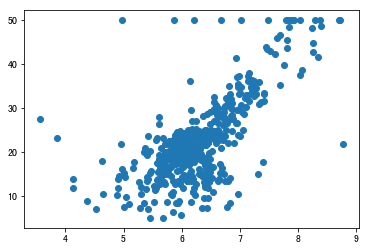

In [74]:
draw_rm_and_price()

In [75]:
import random

In [76]:
def price(rm, k, b):
    return k * rm +b

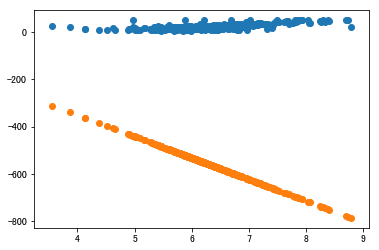

In [77]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

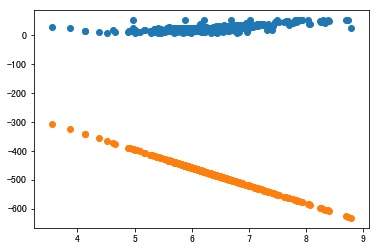

In [78]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$

---

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum{(y_i - (kx_i + b_i))x_i} $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum{(y_i - \hat{y_i})x_i} $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum{(y_i - (kx_i + b_i))} $$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum{(y_i - \hat{y_i})} $$

In [79]:
def loss(y, y_hat):     # to evaluate the perfermance
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [80]:
# zip的作用
for x, y, z in zip([1, 2], [3, 4], ['a', 'b']):
    print(x, y, z)

1 3 a
2 4 b


## First-Method: Random generation: get best k and best b

In [81]:
X_rm = X[:, 5]

In [90]:
trying_times = 100

min_loss = float('inf')
best_k, best_b = None, None

for i in range(100):
    X_rm = X[:, 5]
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('Get best_k: {}, best_b: {}, and the loss is: {}'.format(best_k, best_b, min_loss))

Get best_k: 18, best_b: 25, and the loss is: 13443.798178711451
Get best_k: 17, best_b: -86, and the loss is: 77.20295451185773
Get best_k: 6, best_b: -20, and the loss is: 71.62242231620547
Get best_k: 5, best_b: -8, and the loss is: 52.684031966403175


In [91]:
trying_times = 50000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    X_rm = X[:, 5]
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('when time is: {}, Get best_k: {}, best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

when time is: 0, Get best_k: -89.20304221088875, best_b: -69.19101990995493, and the loss is: 430342.4315821382
when time is: 1, Get best_k: -29.151985980344648, best_b: 72.37809882769943, and the loss is: 18550.63025810218
when time is: 4, Get best_k: 14.156589315090343, best_b: -1.706516529406585, and the loss is: 4246.117368752157
when time is: 21, Get best_k: -3.3905746619974195, best_b: 21.257146725822068, and the loss is: 630.539350913703
when time is: 37, Get best_k: 3.3724528010150863, best_b: 17.801474499216013, and the loss is: 330.8155036976526
when time is: 124, Get best_k: 1.3114373624479043, best_b: 28.515918561928032, and the loss is: 275.855570011061
when time is: 147, Get best_k: 0.5483581001169711, best_b: 29.548189681614872, and the loss is: 189.09476989664782
when time is: 157, Get best_k: 2.835746210149722, best_b: 5.864107798461845, and the loss is: 64.27661051294433
when time is: 198, Get best_k: 4.609695458802477, best_b: -3.4674093494578813, and the loss is: 62

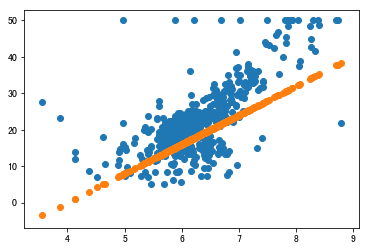

In [92]:
X_rm = X[:, 5]
k = 8
b = -32
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [93]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, +1),
    (+1, -1),
    (-1, +1),
    (-1, -1)
]

next_direction = random.choice(direction)

scalar = 0.1    # 此处可以做优化

update_time = 0

for i in range(trying_times):
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 ==0:
            print("When time is : {}, get best_k: {}, best_b: {}, and the loss is : {}".format(i, best_k, best_b, min_loss))
            
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: -96.98094171773711, best_b: 43.976996182878295, and the loss is : 351385.79617673525
When time is : 19, get best_k: -95.98094171773717, best_b: 42.97699618287828, and the loss is : 345094.47131370514
When time is : 29, get best_k: -94.98094171773722, best_b: 41.97699618287827, and the loss is : 338859.98656232294
When time is : 39, get best_k: -93.98094171773728, best_b: 40.97699618287825, and the loss is : 332682.34192258934
When time is : 49, get best_k: -92.98094171773734, best_b: 39.97699618287824, and the loss is : 326561.5373945036
When time is : 59, get best_k: -91.9809417177374, best_b: 38.976996182878224, and the loss is : 320497.57297806616
When time is : 69, get best_k: -90.98094171773745, best_b: 37.97699618287821, and the loss is : 314490.4486732769
When time is : 79, get best_k: -89.98094171773751, best_b: 36.976996182878196, and the loss is : 308540.16448013607
When time is : 89, get best_k: -88.98094171773756, best_b: 35.97699618287818, and

When time is : 889, get best_k: -8.980941717738324, best_b: -44.023003817122415, and the loss is : 15333.155619428033
When time is : 899, get best_k: -7.980941717738327, best_b: -45.02300381712243, and the loss is : 14043.760581440734
When time is : 909, get best_k: -6.980941717738331, best_b: -46.023003817122444, and the loss is : 12811.205655101669
When time is : 919, get best_k: -5.980941717738334, best_b: -47.02300381712246, and the loss is : 11635.490840410823
When time is : 929, get best_k: -4.980941717738338, best_b: -48.02300381712247, and the loss is : 10516.616137368195
When time is : 939, get best_k: -3.980941717738341, best_b: -49.023003817122486, and the loss is : 9454.581545973775
When time is : 949, get best_k: -2.98094171773834, best_b: -50.0230038171225, and the loss is : 8449.387066227577
When time is : 959, get best_k: -1.980941717738339, best_b: -51.023003817122515, and the loss is : 7501.032698129617
When time is : 969, get best_k: -0.9809417177383383, best_b: -52.

2nd -> 监督它学习 -> 监督学习

### 导数
确定曲线变化的方向，从而起到监督的作用

In [94]:
def partial_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
        
    return -2 / n * gradient

In [95]:
def partial_b(y, y_hat):
    return -2 / len(y) * sum((y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))

In [96]:
import icecream       # python 打印调试库的小库

ModuleNotFoundError: No module named 'icecream'

In [108]:
####
# 近些年来，人工智能研究的热点，都可以在这段代码中体现
####

trying_times = 20000       # 设定尝试次数

X, y = data['data'], data['target']      # 获得x 和 y 的集合

min_loss = float('inf')     # 初始化最小的 loss 为正无穷(float)


#### 
#初始化问题，对于复杂的模型，如何更好的初始化值
current_k = random.random() * 200 - 100     # 随机生成一个 -100 到 100 之间的 k
current_b = random.random() * 200 - 100     # 随机生成一个 -100 到 100 之间的 b
####

learning_rate = 1e-02       # 初始化“学习速率”，从而防止当导数过大时，会使得 current k 和 b，直接“飞过”最低点，甚至后面的 loss 比前面的还大
#update_time = 0       # 初始化更新次数

for i in range(trying_times):    # 在尝试次数内循环
    
    ####
    # price 函数，即模型函数如何定义的问题
    # 接着，在定义了一个很完美的函数，可以拟合所有已有点，但是对于未知点，却有可能使模型函数产生较大的偏差
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]   # 计算 y_hat，即拟合函数的“y”值
    ####
    
    ####
    # loss 函数，究竟是用平方，还是绝对值更好，这也是一个问题
    # regularization问题，即我们的模型中的 k 啊，b 啊，这些系数的值，我们在满足相同的 loss 的情况下，可能有多种系数值的组合，那么，我们又改如何规定，选择哪组值
    current_loss = loss(y, price_by_k_and_b)     # 计算当前 loss，即拟合函数的“y”值与实际样本数据的“y”值的差距
    ####
    
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 500 == 0:
            print("When time is : {}, get best_k: {}, best_b: {}, and the loss is : {}".format(i, current_k, current_b, min_loss))
    
    ####
    # 如何高效的求导
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)    # 计算 k 在 loss 内的导数
    b_gradient = partial_b(y, price_by_k_and_b)    # 计算 b 在 loss 内的导数
    ####
    
    # 纠正当前的 k，-1*k_gradient 的-1 原因是，根据二次函数的曲线，导数为正，则需要把 k 往负的方向移动，导数为负，则需要往正的方向移动，这样才能逐渐往最优的 k 和 b 点移动         
    ####
    # learning_rate 学习速率，优化问题
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate
    ####
    
    

When time is : 0, get best_k: 28.113449598687367, best_b: -17.305454891396877, and the loss is : 18948.090596008333
When time is : 500, get best_k: 7.146451839633154, best_b: -22.23045491258408, and the loss is : 45.507284262662516
When time is : 1000, get best_k: 7.368031293540299, best_b: -23.63994796740783, and the loss is : 45.09968914412491
When time is : 1500, get best_k: 7.5645053987895725, best_b: -24.889742936744707, and the loss is : 44.7792241192931
When time is : 2000, get best_k: 7.738718636311504, best_b: -25.997933899470087, and the loss is : 44.52726371184537
When time is : 2500, get best_k: 7.893193202256791, best_b: -26.980564842942115, and the loss is : 44.329163944313635
When time is : 3000, get best_k: 8.030165523438656, best_b: -27.851861942039722, and the loss is : 44.1734112278704
When time is : 3500, get best_k: 8.151618635510143, best_b: -28.624439520569318, and the loss is : 44.05095319078279
When time is : 4000, get best_k: 8.25931089263605, best_b: -29.3094

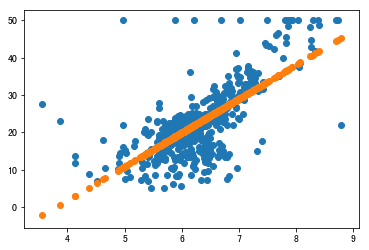

In [109]:
X_rm = X[:, 5]
k = 9.081842687456355
b = -34.54170449044165
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)